In [2]:
# Libraries
from gym import Env
from gym.spaces import Discrete, Box, MultiBinary, MultiDiscrete
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [3]:
class TAEnvironmentShortestPath(Env):
    def __init__(self):
        # pergerakan yang bisa diambil (limited rook)
        self.action_space = Discrete(4) # 0=utara; 1=timur; 2=selatan; 3=barat
        # arena
        # 0=belumeksplor; 1=sudaheksplor; 2=obstacle; 3=startpoint
        # 15 x 9
        self.myarena = [
            [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0], # 0 - 14
            [2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0], # 15 - 29
            [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0], # 30 - 44
            [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0], # 45 - 59
            [0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0], # 60 - 74
            [0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0], # 75 - 89
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 90 - 104
            [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2], # 105 - 119
            [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 2]  # 120 - 134
        ]
        # observation space
        # ada 135 kemungkinan posisi
        self.observation_space = Discrete(135)
        # posisi awal
        self.xpos = 0
        self.ypos = 0
        # current_state
        self.current_state = self.ypos*15 + self.xpos      
        
    def step(self, action):
        reward = 0
        done = False
        info = {}
        
        if (action == 0): # ke atas
            self.ypos -= 1
            if (self.ypos == -1): # keluar batas
                reward -=1
                self.ypos +=1
            else:
                if (self.myarena[self.ypos][self.xpos] == 0): # area baru
                    self.myarena[self.ypos][self.xpos] = 1
                    reward -= 1
                elif (self.myarena[self.ypos][self.xpos] == 1): # area lama
                    reward -=1
                elif(self.myarena[self.ypos][self.xpos] == 4):
                    reward +=10
                    done = True
                else: # obstacle
                    reward -=1
                    self.ypos += 1
        elif (action == 1): # ke kanan
            self.xpos += 1
            if (self.xpos == 15): # keluar batas
                reward -=1
                self.xpos -=1
            else:
                if (self.myarena[self.ypos][self.xpos] == 0): # area baru
                    self.myarena[self.ypos][self.xpos] = 1
                    reward -= 1
                elif (self.myarena[self.ypos][self.xpos] == 1): # area lama
                    reward -=1
                elif(self.myarena[self.ypos][self.xpos] == 4):
                    reward +=10
                    done = True
                else: # obstacle
                    reward -=1
                    self.xpos -= 1
        elif (action == 2): # ke bawah
            self.ypos += 1
            if (self.ypos == 9): # keluar batas
                reward -=1
                self.ypos -=1
            else:
                if (self.myarena[self.ypos][self.xpos] == 0): # area baru
                    self.myarena[self.ypos][self.xpos] = 1
                    reward -= 1
                elif (self.myarena[self.ypos][self.xpos] == 1): # area lama
                    reward -=1
                elif(self.myarena[self.ypos][self.xpos] == 4):
                    reward +=10
                    done = True
                else: # obstacle
                    reward -=1
                    self.ypos -= 1
        else: # ke kiri
            self.xpos -= 1
            if (self.xpos == -1): # keluar batas
                reward -=1
                self.xpos += 1
            else:
                if (self.myarena[self.ypos][self.xpos] == 0): # area baru
                    self.myarena[self.ypos][self.xpos] = 1
                    reward -= 1
                elif (self.myarena[self.ypos][self.xpos] == 1): # area lama
                    reward -=1
                elif(self.myarena[self.ypos][self.xpos] == 4):
                    reward +=10
                    done = True
                else: # obstacle
                    reward -=1
                    self.xpos += 1
        
        self.current_state = self.ypos*15 + self.xpos  
                        
        return self.current_state, self.xpos, self.ypos, reward, done, info
    
    def render(self):
        pass
    
    def reset(self):
        self.myarena = [
            [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0], # 0 - 14
            [2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0], # 15 - 29
            [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0], # 30 - 44
            [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0], # 45 - 59
            [0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0], # 60 - 74
            [0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0], # 75 - 89
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 90 - 104
            [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2], # 105 - 119
            [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 2]  # 120 - 134
        ]
        self.xpos = 0
        self.ypos = 0
        self.current_state = self.ypos*15 + self.xpos  
            
        return self.current_state

In [4]:
myenv = TAEnvironmentShortestPath()
myenv.myarena

[[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
 [2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0],
 [0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 2]]

In [5]:
# Learning parameter 
Qtable = np.zeros([myenv.observation_space.n, myenv.action_space.n])
learningrate = 0.1
discountrate = 1.0
explorationrate = 0.1
episode = 1000

episode1000

training complete


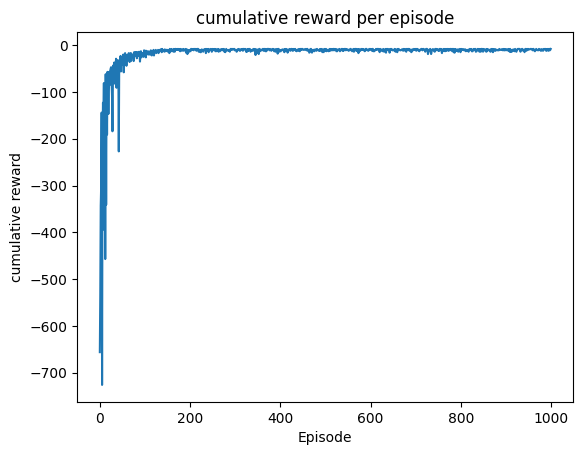

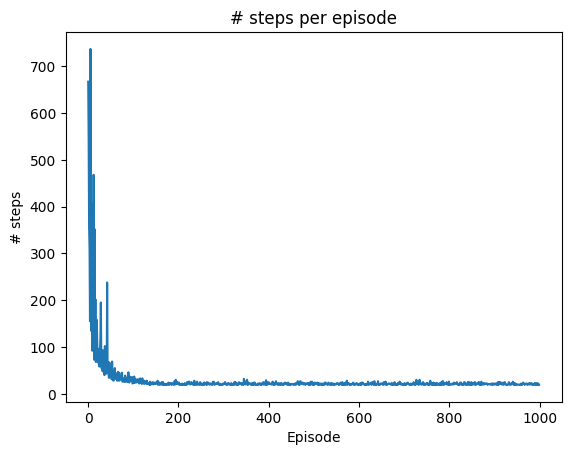

In [6]:
total_reward = np.zeros([episode])
total_step = np.zeros([episode])

for i in range(1, episode+1):
    state= myenv.reset()
    step = 0
    accumulated_reward = 0
    objective_achieved = False
    
    while not objective_achieved:
        if random.uniform(0, 1) < explorationrate: # pergerakan random untuk data tambahan
            action = myenv.action_space.sample()
        else: #eksploitasi data yang ada
            action = np.argmax(Qtable[state])
            
        next_state, x, y, reward, objective_achieved, info = myenv.step(action)
        accumulated_reward += reward
        
        old_q_value = Qtable[state, action]
        next_max_q_value = np.max(Qtable[next_state])
        
        new_q_value = (1-learningrate)*old_q_value + learningrate*(reward + discountrate*next_max_q_value)
        
        Qtable[state, action] = new_q_value
        
        state = next_state
        step += 1
    
    total_reward[i-1] = accumulated_reward
    total_step[i-1] = step
    
    clear_output(wait=True)
    print("episode" + str(i))

print("\ntraining complete")

# grafik jumlah reward
plt.title("cumulative reward per episode")
plt.xlabel("Episode")
plt.ylabel("cumulative reward")
plt.plot(total_reward)
plt.show()

# grafik jumlah tindakan
plt.title("# steps per episode")
plt.xlabel("Episode")
plt.ylabel("# steps")
plt.plot(total_step)
plt.show()

In [7]:
next_state = myenv.reset()

In [26]:
next_state, x, y, reward, objective_achieved, info = myenv.step(np.argmax(Qtable[next_state]))
myenv.myarena

[[3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0],
 [2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0],
 [0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2],
 [2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 2, 2, 2]]